In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd


In [2]:
nami = pd.read_json('../tsunamilab/pois')

In [4]:
ewave = pd.read_csv('../easyWave/eWave.poi.ssh', delim_whitespace=True)
ewave.head()

,Minute,21414,21419,21401,21418,21413,52403,52406,55012,51425,...,46404,46407,46411,46412,43412,43413,32411,32412,32413,32401
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
DARTs = [21414, 21419, 21401, 21418, 21413, 52403, 52406, 55012, 51425, 51407,
        46404, 46407, 46411, 46412, 43412, 43413, 32411, 32412,32413,32401]
skipBuoys = [32401, 32413, 43413, 52406, 21401, 21419, 21414]

DARTs = [dart for dart in DARTs if dart not in skipBuoys]

In [13]:
from clawpack.pyclaw.gauges import GaugeSolution
geoclaw = {
    gauge_id : GaugeSolution(gauge_id=gauge_id, path='../geoclaw/_output')
    for gauge_id in DARTs
    
}

/home/jovyan/clawpack-v5.7.1/pyclaw/src/pyclaw/gauges.py:138: UserWarning: Gauge file 32411 is empty.
  warnings.warn("Gauge file %s is empty." % gauge_id)


In [6]:
darts = {}

for dart in DARTs:
#     print(dart)
    darts[dart] = np.loadtxt('../data/tsunamiDART{}'.format(dart))

In [7]:
ranges = {
    21418: 0,
    21413: 1200,
    52403: 1300,
    55012: 1000,
    51425: 800,
    51407: 800,
    46404: 900,
    46407: 800,
    46411: 800,
    46412: 700,
    43412: 550,
    32411: 1100,
    32412: 175,
    32413: 260,
    32401: 100
}

In [8]:
nami.columns

Int64Index([21401, 21413, 21414, 21418, 21419, 32401, 32411, 32412, 32413,
            43412, 43413, 46404, 46407, 46411, 46412, 51407, 51425, 52403,
            52406, 55012],
           dtype='int64')

In [9]:
nami

,21401,21413,21414,21418,21419,32401,32411,32412,32413,43412,43413,46404,46407,46411,46412,51407,51425,52403,52406,55012
location,"[152.583, 42.617]","[152.132, 30.533]","[178.219, 48.968]","[148.645, 38.727]","[155.717, 44.435]","[286.579, -20.474]","[-90.88, 4.953]","[273.626, -17.984]","[266.483, -7.406]","[253.03300000000002, 16.045]","[259.91700000000003, 11.012]","[231.267, 45.853]","[231.168, 42.682]","[232.933, 39.333]","[239.437, 32.492]","[203.455, 19.57]","[183.68, -9.517]","[145.52, 4.02]","[164.977, -5.307]","[158.453, -15.664]"
pixel,"[1251, 2052]","[1242, 1810]","[1764, 2179]","[1173, 1974]","[1314, 2088]","[3930, 790]","[-3616, 1299]","[3671, 840]","[3528, 1051]","[3260, 1520]","[3397, 1420]","[2824, 2116]","[2822, 2053]","[2858, 1986]","[2988, 1849]","[2268, 1591]","[1873, 1009]","[1110, 1280]","[1499, 1093]","[1369, 886]"
surface,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
time,"[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989..."
shallowCorrectionFactor,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


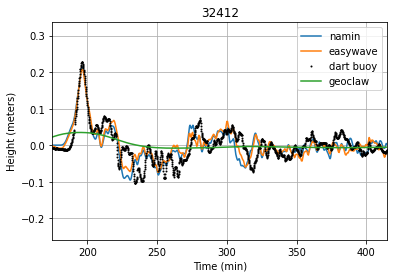

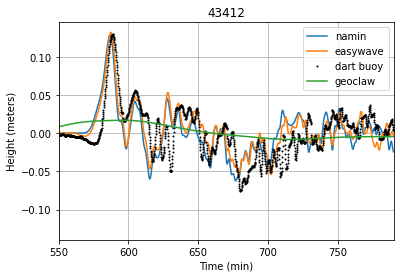

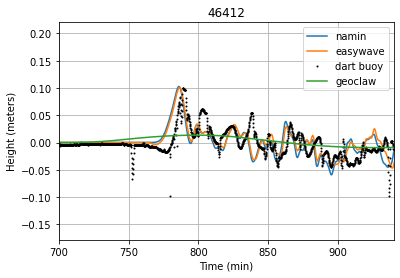

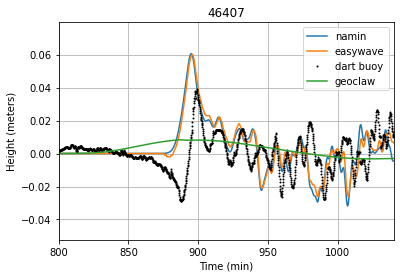

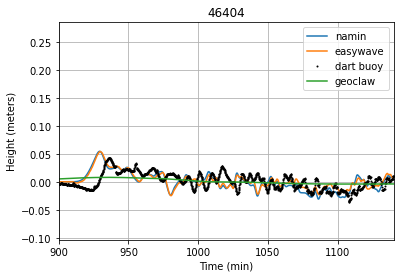

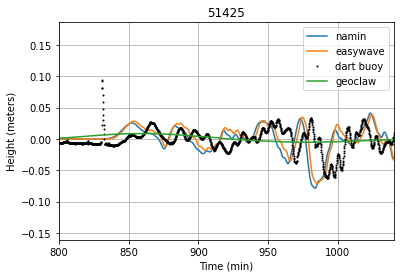

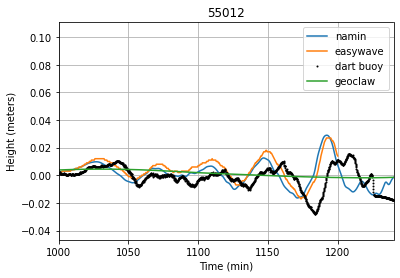

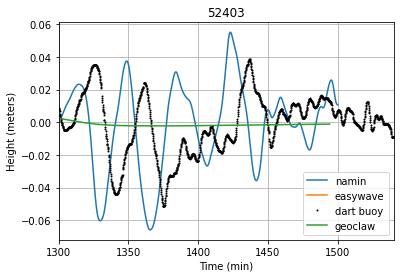

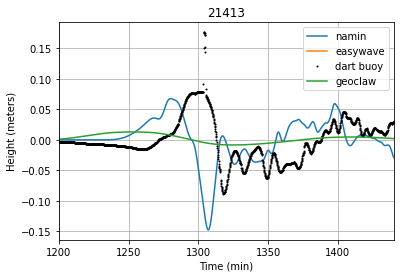

In [19]:
poisid = [32412,
    43412,
    46412,
    46407,
    46404,
    51425,
    55012,
    52403,
    21413]

for dart_number in poisid:
    plt.plot(np.array(nami[dart_number].time)/60, nami[dart_number].surface,label='namin')

    plt.plot(ewave['Minute'], ewave[str(dart_number)],label='easywave')
    plt.plot(darts[dart_number][:,0]*60*24, darts[dart_number][:,1],'.', label='dart buoy', ms=2, c='k')
    plt.plot(geoclaw[dart_number].t/60, geoclaw[dart_number].q[3,:], label="geoclaw")
    plt.legend(loc=0)
    plt.xlim(ranges[dart_number], ranges[dart_number]+4*60)
    plt.title(dart_number)
    plt.xlabel('Time (min)')
    plt.ylabel('Height (meters)')
    plt.grid('on')
    plt.show()
